In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from pyhomebroker import HomeBroker

Primero calculamos el dólar CCL desde el último viernes pre paso 2019.

In [2]:
day, month, year = 9, 8, 2019

user = 'gcaserta'
password = 'CasaPadua22'
broker = 265
dni = '42193912'

hb = HomeBroker(broker_id=broker)
hb.auth.login(dni=dni, user=user, password=password, raise_exception=True)
ggal_pesos = hb.history.get_daily_history('GGAL', from_date=dt.date(year,month,day), to_date=dt.date(2023,5,24))
ggal_pesos['date'] = pd.to_datetime(ggal_pesos['date'], format='%Y/%m/%d')
ggal_pesos.set_index(ggal_pesos['date'], inplace=True)
ggal_pesos = ggal_pesos.iloc[:, 1:]

ggal_usd = yf.download('GGAL', start=f'{year}-{month}-{day}', end='2023-5-24', auto_adjust=True)

df_ccl = pd.concat([ggal_pesos['close'], ggal_usd['Close']], axis=1)
df_ccl.columns = ['pesos', 'dolares']
df_ccl['ccl'] = ((df_ccl['pesos'] / df_ccl['dolares']) * 10)
df_ccl = df_ccl['ccl']
df_ccl.tail()

[*********************100%***********************]  1 of 1 completed


2019-08-09    49.410942
2019-08-12    59.604982
2019-08-13    63.024034
2019-08-14    66.765616
2019-08-15    63.024112
Name: ccl, dtype: float64

Descargamos la cotización histórica de las acciones argentinas.

In [3]:
panel_lider = pd.read_html('https://es.wikipedia.org/wiki/S%26P_Merval')[1]['Símbolo'].to_list()
panel_general = pd.read_html('https://es.wikipedia.org/wiki/S%26P_Merval')[2]['Símbolo'].to_list()
merval = panel_lider + panel_general

dic_cotizaciones = {}

for ticker in merval:
    data = hb.history.get_daily_history(ticker, from_date=dt.date(year,month,day), to_date=dt.date(2023,5,24))
    data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
    data.set_index(data['date'], inplace=True)
    data = data.iloc[:, 1:]
    close = data['close'] / df_ccl
    dic_cotizaciones[ticker] = close

Transformamos el diccionario en un DataFrame.

In [ ]:
df_cotizaciones = pd.DataFrame(dic_cotizaciones)
df_cotizaciones

,AGRO,ALUA,BBAR,BMA,BYMA,GGAL,SUPV,PAMP,YPFD,VALO,...,MTR,OEST,PATA,PGR,POLL,RICH,ROSE,SAMI,SEMI,TGLT
2019-08-09,0.221611,0.355184,3.712740,7.100654,7.194763,3.532618,1.407583,1.285140,15.381208,0.154824,...,NaN,0.748822,0.497865,0.221611,0.157860,0.991683,NaN,1.700028,0.056668,0.093097
2019-08-12,0.124151,0.243268,1.629897,3.148227,3.359619,1.550206,0.609009,0.587199,10.593913,0.092777,...,NaN,0.474793,NaN,0.157873,NaN,0.729805,NaN,1.023404,0.037581,0.057042
2019-08-13,0.130585,0.273705,1.824701,3.477245,3.566100,1.594630,0.663239,0.599771,10.521383,0.096471,...,NaN,0.468075,NaN,0.175330,0.120589,0.666412,NaN,1.174155,0.036811,0.056962
2019-08-14,NaN,0.262111,1.698479,3.334800,3.332553,1.534472,0.614837,0.565411,9.547578,0.090016,...,NaN,NaN,NaN,0.164755,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15,0.126301,0.307025,1.825492,3.631150,3.720799,1.616842,0.731466,0.648958,9.887487,0.098692,...,NaN,0.507742,NaN,0.168190,0.120589,0.634678,NaN,1.253489,0.039667,0.060294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculamos el upside para cada compañía, para recuperar el valor en dólares del viernes pre paso 2019.

In [ ]:
dic_upside = {}

for empresa in merval:
    df_cotizaciones_filtrada = df_cotizaciones[empresa]
    precio1 = df_cotizaciones_filtrada[0]
    precio2 = df_cotizaciones_filtrada[-1]
    upside = round((precio1 / precio2) * 100, 0)
    dic_upside[empresa] = upside

In [ ]:
ds_upside = pd.Series(dic_upside)
ds_upside.sort_values(ascending=False, inplace=True)
ds_upside.dropna(inplace=True)
ds_upside = ds_upside.astype(int)
ds_upside.head()

Series([], dtype: int32)

Gráficamos.

ValueError: min() arg is an empty sequence

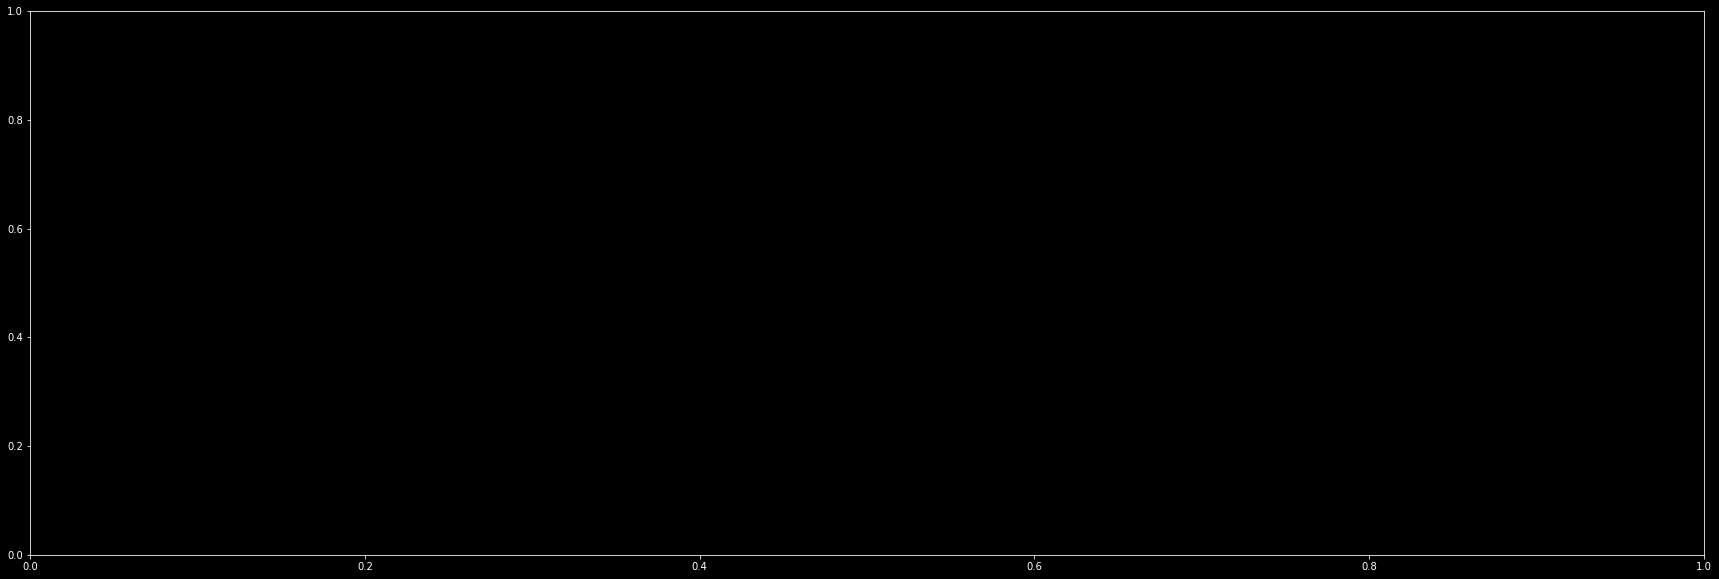

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x=ds_upside.index, y=ds_upside.values)
plt.title(f'Upside en dólares para recuperar valor fecha {df_cotizaciones.index[0].date()}, viernes pre paso 2019')
plt.xticks(rotation=90)
plt.xlabel('Tickers')
plt.ylabel('Upside % en U$D')
for i in ax.containers:
    plt.bar_label(i, ds_upside.values)
plt.show()